In [2]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import os
import seaborn as sns
import pandas as pd
import os
import numpy as np
import itertools
import statistics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
trial_num = 'uniform_final_v1'
param_values = np.load('../param_values/param_values_trial'+str(trial_num)+'.npy')
R_es = param_values[:,0]  #R_es in pc
GC_masses = param_values[:,1]  #total GC mass in log Solar Mass
halo_masses = param_values[:,2]  #DM halo in log Solar Mass

GC_masses = np.append(GC_masses, [10**5.5, 10**5.7, 10**5.8, 
                                  10**5.9, 10**6.1, 10**6.2, 10**6.3, 
                                  10**6.4, 10**6.6, 10**6.7,
                                 10**6.7, 10**6.8, 10**6.9, 10**7.1, 
                                  10**7.2, 10**7.3, 10**7.4])
R_es = np.append(R_es, [10**3.5, 10**2.9, 10**2.8, 10**3.1, 10**3.3])


In [38]:
# Data containers
no_merger_Re, no_merger_GC, no_merger_halo, max_no_merger_masses = [], [], [], []
merger_Re, merger_GC, merger_halo, max_merger_masses, merger_num = [], [], [], [], []
std_masses, all_Re, all_GC, all_halo = [], [], [], []
max_mass_distances, central_max_mass = [], []


# Path for simulation files
path_name = '/home/vk9342/JP_fall_2024/test_sim_run_trial_'+str(trial_num)+'/'

# ## Iterate through every combination of parameters
# for i in (len(R_es)):
    
#     R_e = R_es[i]
#     GC_mass = GC_masses[i]
#     halo_mass = halo_masses[i]
    
for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    
    R_e_sim = round(R_e / 1000, 3)
    GC_mass_sim = round(GC_mass * 1e-5, 3)
    halo_mass_sim = round(halo_mass, 1)

    file_name0 = 'Sim_NFW_0_'+str(R_e_sim)+'_'+str(GC_mass_sim)+'_'+str(halo_mass_sim)+'.txt'  #initial
    file_name20 = 'Sim_NFW_20_'+str(R_e_sim)+'_'+str(GC_mass_sim)+'_'+str(halo_mass_sim)+'.txt' #final 
    file_path20 = os.path.join(path_name, file_name20)

    if os.path.exists(file_path20):
        data_initial = np.genfromtxt(os.path.join(path_name, file_name0), skip_header=2)
        data_final = np.genfromtxt(file_path20, skip_header=2)

        iteration_initial, all_masses_initial = data_initial[:, 0], data_initial[:, 1]
        iteration_final, all_masses_final = data_final[:, 0], data_final[:, 1]

        x_final, y_final, z_final = data_final[:, 2], data_final[:, 3], data_final[:, 4]

        # Calculate number of masses per iteration
        def get_mass_counts(iteration, all_masses):
            counts = []
            for t in range(10):
                masses = [mass for i, mass in enumerate(all_masses) if iteration[i] == t]
                counts.append(len(masses))
            return counts
    
        initial_num_masses = get_mass_counts(iteration_initial, all_masses_initial)
        final_num_masses = get_mass_counts(iteration_final, all_masses_final)

        # # Compute max masses for final iterations
        # max_masses = [max([mass for i, mass in enumerate(all_masses_final) 
        #                    if iteration_final[i] == t], default=0) 
        #               for t in range(10)]
        # max_mass = np.mean(max_masses)

        max_masses_and_indices = [
            max(
                ((mass, i) for i, mass in enumerate(all_masses_final) if iteration_final[i] == t), 
                default=(0, -1),  # Default value when no masses exist
                key=lambda x: x[0]  # Compare by mass
            )
            for t in range(10)
        ]

        max_masses = [item[0] for item in max_masses_and_indices]
        max_indices = [item[1] for item in max_masses_and_indices]
        max_mass = np.mean(max_masses)
                          
        max_mass_distances = [np.sqrt(x_final[indx]**2 + y_final[indx]**2 + z_final[indx]**2) 
                              for indx in max_indices] 
        max_mass_distance = np.mean(max_mass_distances)
        d_threshold = 0.1 * R_e

        # Calculate number of mergers per iteration
        num_mergers = [initial - final for initial, final in zip(initial_num_masses, final_num_masses)]
        avg_num_mergers = np.mean(num_mergers)        

        # Classify as merger or no merger
        if ((avg_num_mergers >= 1 and max_mass > 20) 
            or avg_num_mergers >= 3 
            or (max_mass > 0.2 * GC_mass and avg_num_mergers >= 1)
           and max_mass_distance <= d_threshold):
            merger_Re.append(R_e)
            merger_GC.append(GC_mass)
            merger_halo.append(halo_mass)
            max_merger_masses.append(max_mass)
            merger_num.append(avg_num_mergers)
        else:
            no_merger_Re.append(R_e)
            no_merger_GC.append(GC_mass)
            no_merger_halo.append(halo_mass)


        
    else:
        print(f'File {file_name20} not found')


File Sim_NFW_20_0.501_1000.0_31622776601.7.txt not found
File Sim_NFW_20_0.501_1000.0_177827941003.9.txt not found
File Sim_NFW_20_0.501_1000.0_1000000000000.0.txt not found
File Sim_NFW_20_0.501_63.096_1000000000.0.txt not found
File Sim_NFW_20_0.501_63.096_5623413251.9.txt not found
File Sim_NFW_20_0.501_63.096_31622776601.7.txt not found
File Sim_NFW_20_0.501_63.096_177827941003.9.txt not found
File Sim_NFW_20_0.501_63.096_1000000000000.0.txt not found
File Sim_NFW_20_0.501_79.433_1000000000.0.txt not found
File Sim_NFW_20_0.501_79.433_5623413251.9.txt not found
File Sim_NFW_20_0.501_79.433_31622776601.7.txt not found
File Sim_NFW_20_0.501_79.433_177827941003.9.txt not found
File Sim_NFW_20_0.501_79.433_1000000000000.0.txt not found
File Sim_NFW_20_0.501_125.893_1000000000.0.txt not found
File Sim_NFW_20_0.501_125.893_5623413251.9.txt not found
File Sim_NFW_20_0.501_125.893_31622776601.7.txt not found
File Sim_NFW_20_0.501_125.893_177827941003.9.txt not found
File Sim_NFW_20_0.501_1

In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# %config InlineBackend.figure_format = 'retina'

# data1 = pd.DataFrame({
#     'log (Re/pc)': np.log10(np.array(merger_Re)),
#     'log ($M_{GC}$ / $M_\odot$)':np.log10(merger_GC),
#     'log ($M_{halo}$/ $M_\odot$)': np.log10(merger_halo),
#     'Type': ['GC merger'] * len(merger_Re)})

# data2 = pd.DataFrame({
#     'log (Re/pc)': np.log10(np.array(no_merger_Re)),
#     'log ($M_{GC}$ / $M_\odot$)': np.log10(no_merger_GC),
#     'log ($M_{halo}$/ $M_\odot$)': np.log10(no_merger_halo),
#     'Type': ['no GC mergers'] * len(no_merger_Re)})
# combined_data = pd.concat([data2, data1])


# # plt.figure(figsize=(20, 20))

# g = sns.PairGrid(combined_data, hue='Type', corner = True, palette = ['dodgerblue', 'tomato'], height=3)
# g.map(sns.scatterplot, s = 10, alpha = 1)
# g.fig.subplots_adjust(wspace=0.1, hspace=0.1)
# for i, y_var in enumerate(g.y_vars):
#     for j, x_var in enumerate(g.x_vars):
#         if x_var == y_var:
#             g.axes[i, j].set_visible(False)

# for ax in g.axes.flatten():
#     if ax is not None:
#         ax.tick_params(axis='x', labelsize=10)
#         ax.tick_params(axis='y', labelsize=10)
#         ax.xaxis.label.set_size(15)  # Adjust x-axis label size
#         ax.yaxis.label.set_size(15)  # Adjust y-axis label size


# # g.add_legend(loc='center')
# # plt.savefig('grid_plot_1.png')

# g.fig.text(0.5, 0.7, '$\log (M_* / M_{\odot})= 8$', ha='center', fontsize=15)
# plt.show()

# # plt.figure()
# # plt.scatter(merger_Re, merger_halo, c = 'r')
# # plt.scatter(no_merger_Re, no_merger_halo, c = 'b')

# # plt.figure()
# # plt.scatter(no_merger_Re, no_merger_halo, color = 'blue', alpha = 0.2, s = 3)
# # plt.scatter(merger_Re, merger_halo, color = 'red', alpha = 0.2, s = 3)

# # plt.show



if there is an object in the innermost region that is more than eg 20% of total mass
or number of mergers 

maybe do an or statement (above certain mass, at least 3 mergers, or)

fix gc mass problem

make .py file



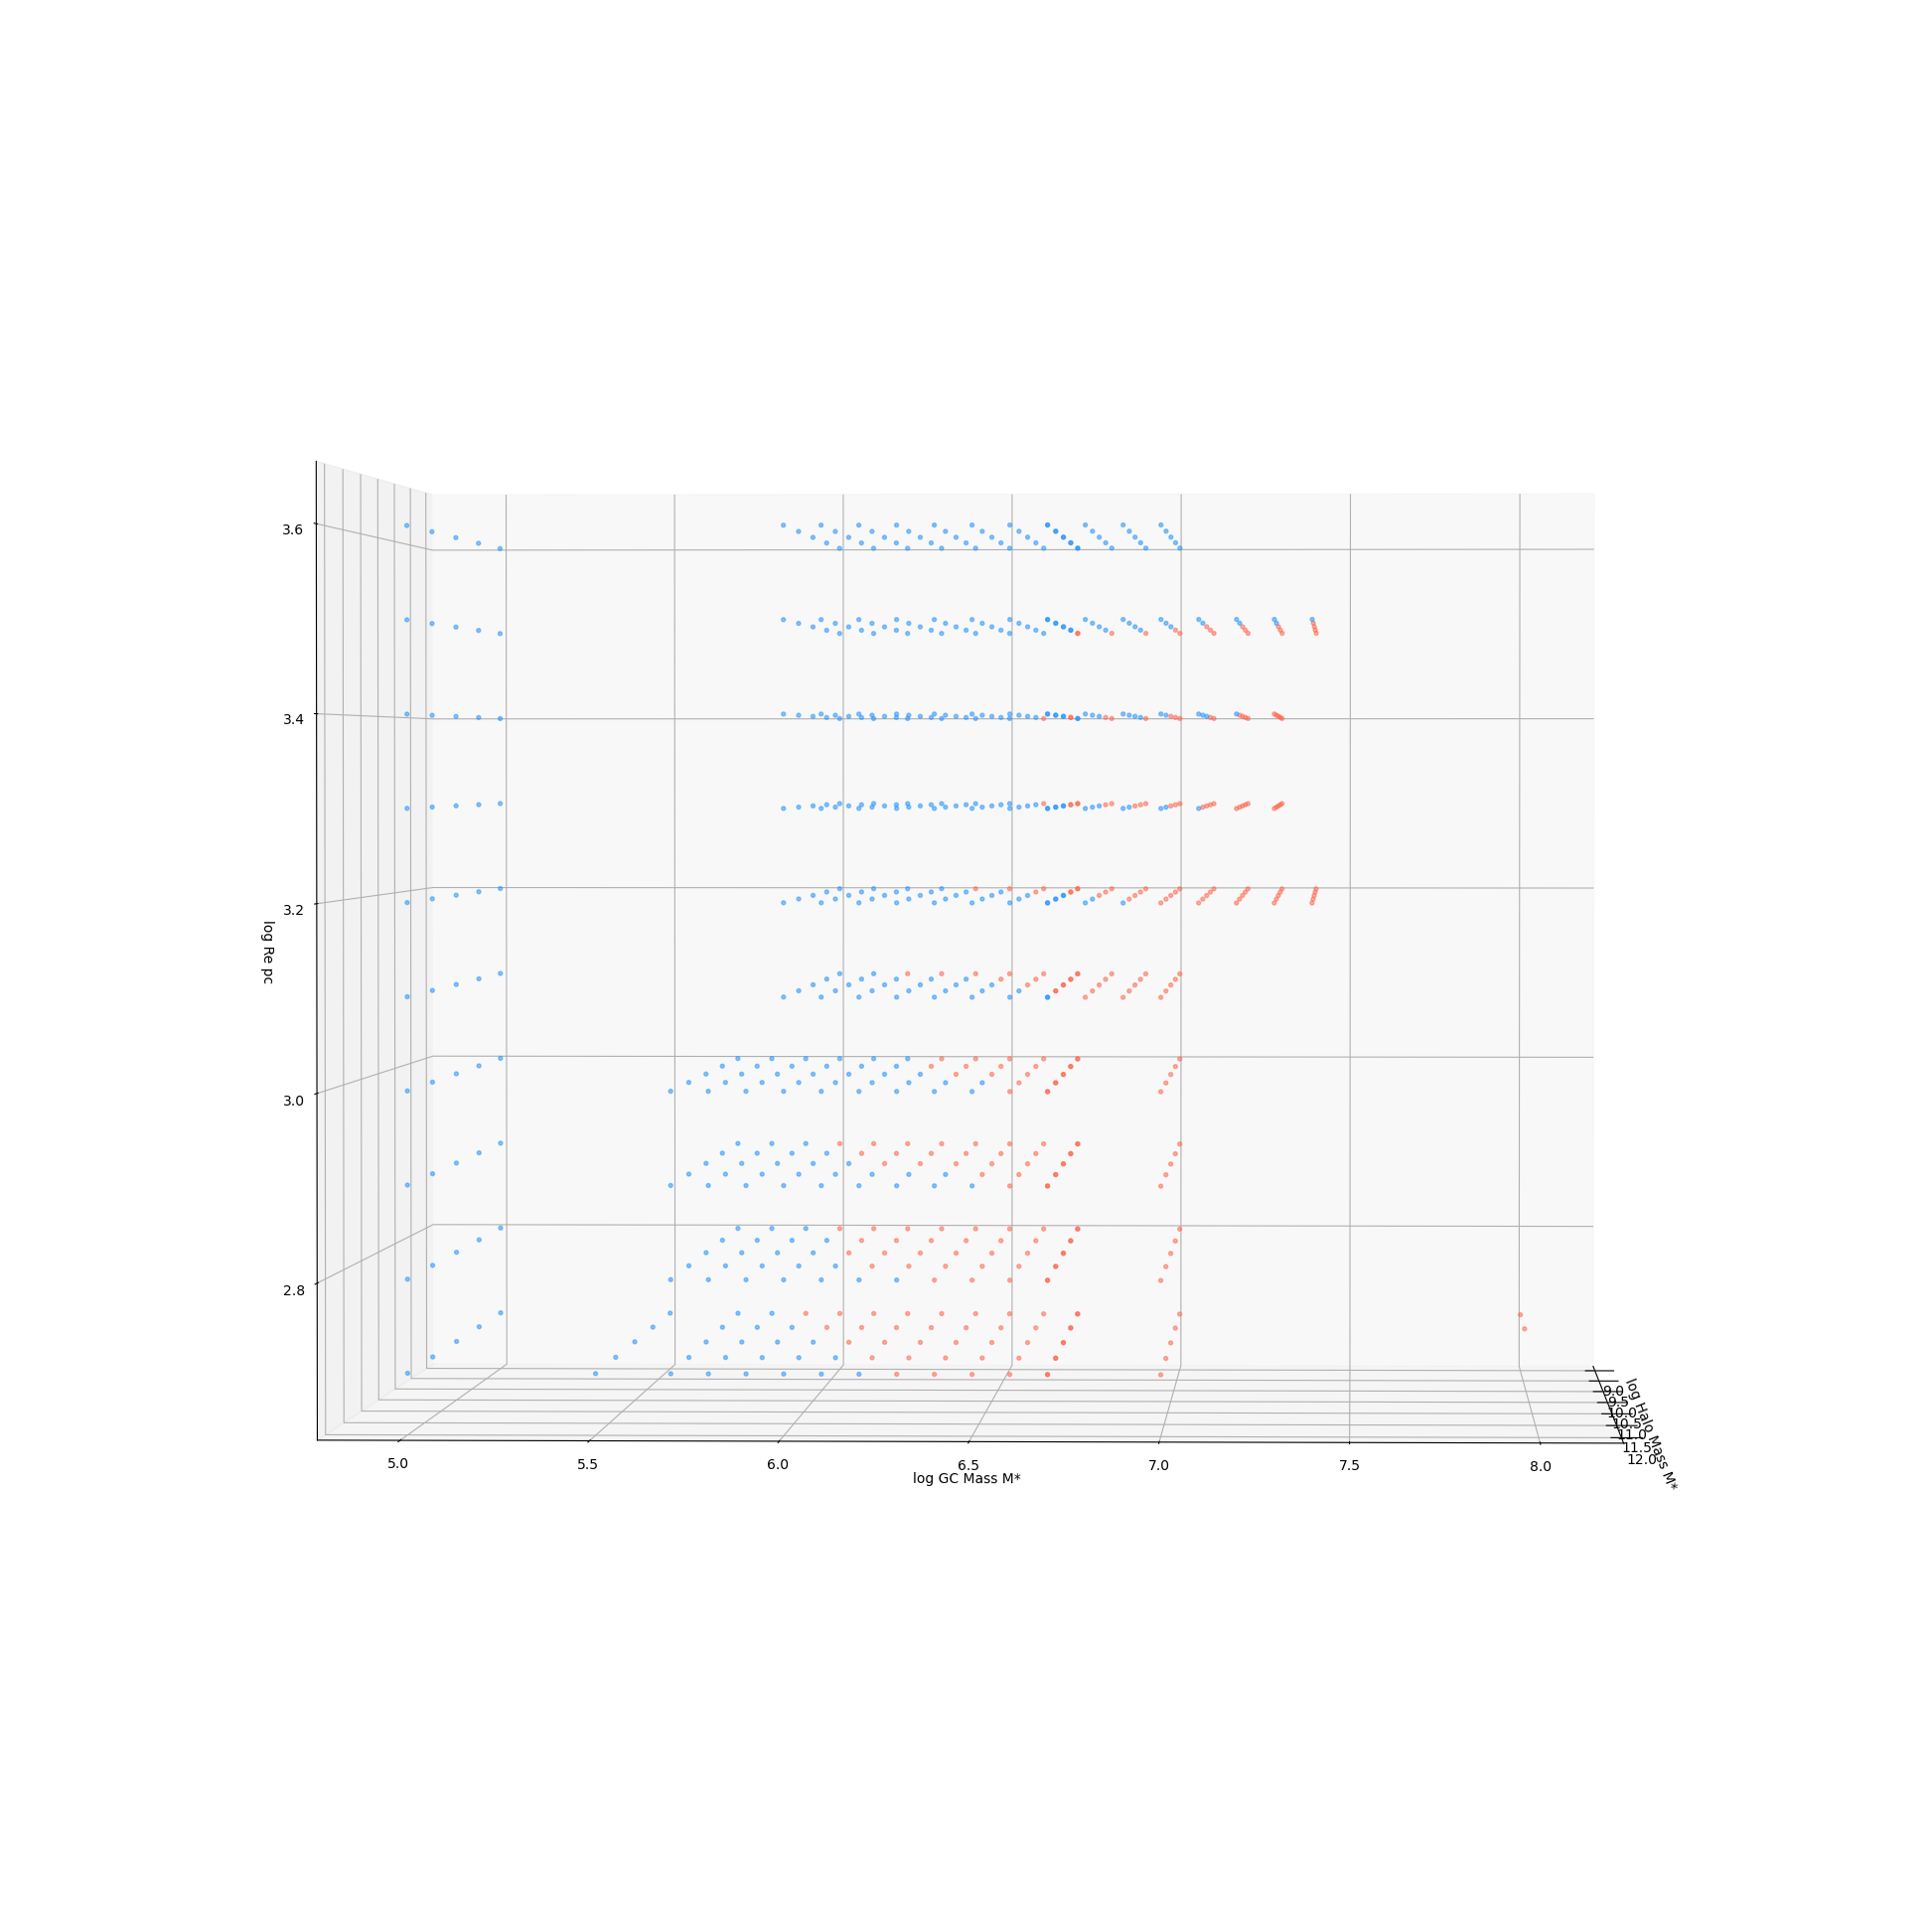

3981.0717055349733


In [40]:

R_es = np.concatenate([np.log10(np.array(merger_Re)), np.log10(np.array(no_merger_Re))])
GC_masses = np.concatenate([np.log10(merger_GC), np.log10(no_merger_GC)])
halo_masses = np.concatenate([np.log10(merger_halo), np.log10(no_merger_halo)])
mergers = np.concatenate([np.ones(len(merger_Re)), np.zeros(len(no_merger_Re))])  # 1 for merger, 0 for no merger
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
def d3_plot(R_es, GC_masses, halo_masses, mergers, elev=5, azim=183):
    fig = plt.figure(figsize=(25,25))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['tomato' if m == 1 else 'dodgerblue' for m in mergers]
    
    ax.scatter(halo_masses, GC_masses, R_es, c=colors, alpha = 0.5, s = 8)
    # ax.set_xlim(1.5, 1.7)
    ax.set_zlabel('log Re pc')
    ax.set_ylabel('log GC Mass M*')
    ax.set_xlabel('log Halo Mass M*')
    
    ax.view_init(elev=elev, azim=azim)
    
    plt.savefig('3d_grid_plot1.png')
    
    plt.show()

d3_plot(R_es, GC_masses, halo_masses, mergers, elev=1, azim=2)
# d3_plot(R_es, GC_masses, halo_masses, mergers, elev=5, azim=0)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(max(no_merger_Re))

In [29]:
print(len(R_es))
print(len(GC_masses))
print(len(halo_masses))
print(len(mergers))

747
747
747
747


In [30]:
# Stack grid and classification data into a single NumPy array
grid_data = np.column_stack((R_es, GC_masses, halo_masses, mergers))

# Save as a NumPy file
np.save("../grid_merger_classification.npy", grid_data)

print("Grid and classifications saved to grid_merger_classification.npy")


Grid and classifications saved to grid_merger_classification.npy


# Classify by number of NSCs in the 10 iterations

In [31]:
trial_num = 'uniform_final_v1'
param_values = np.load('../param_values/param_values_trial'+str(trial_num)+'.npy')
R_es = param_values[:,0]  #R_es in pc
GC_masses = param_values[:,1]  #total GC mass in log Solar Mass
halo_masses = param_values[:,2]  #DM halo in log Solar Mass

GC_masses = np.append(GC_masses, [10**5.5, 10**5.7, 10**5.8, 
                                  10**5.9, 10**6.1, 10**6.2, 10**6.3, 
                                  10**6.4, 10**6.6, 10**6.7,
                                 10**6.7, 10**6.8, 10**6.9, 10**7.1, 
                                  10**7.2, 10**7.3, 10**7.4])
R_es = np.append(R_es, [10**3.5, 10**2.9, 10**2.8, 10**3.1, 10**3.3])


In [32]:
# Data containers
plot_Re, plot_GC, plot_halo = [], [], []
std_masses, all_Re, all_GC, all_halo = [], [], [], []
max_mass_distances, central_max_mass = [], []
n_NSCs = []

# Path for simulation files
path_name = '/home/vk9342/JP_fall_2024/test_sim_run_trial_'+str(trial_num)+'/'

# ## Iterate through every combination of parameters
for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    
    R_e_sim = round(R_e / 1000, 3)
    GC_mass_sim = round(GC_mass * 1e-5, 3)
    halo_mass_sim = round(halo_mass, 1)

    file_name0 = 'Sim_NFW_0_'+str(R_e_sim)+'_'+str(GC_mass_sim)+'_'+str(halo_mass_sim)+'.txt'  #initial
    file_name20 = 'Sim_NFW_20_'+str(R_e_sim)+'_'+str(GC_mass_sim)+'_'+str(halo_mass_sim)+'.txt' #final 
    file_path20 = os.path.join(path_name, file_name20)

    if os.path.exists(file_path20):
        data_initial = np.genfromtxt(os.path.join(path_name, file_name0), skip_header=2)
        data_final = np.genfromtxt(file_path20, skip_header=2)

        iteration_initial, all_masses_initial = data_initial[:, 0], data_initial[:, 1]
        iteration_final, all_masses_final = data_final[:, 0], data_final[:, 1]

        x_final, y_final, z_final = data_final[:, 2], data_final[:, 3], data_final[:, 4]

        # Calculate number of masses per iteration
        def get_mass_counts(iteration, all_masses):
            counts = []
            for t in range(10):
                masses = [mass for i, mass in enumerate(all_masses) if iteration[i] == t]
                counts.append(len(masses))
            return counts
    
        initial_num_masses = get_mass_counts(iteration_initial, all_masses_initial)
        final_num_masses = get_mass_counts(iteration_final, all_masses_final)

        max_masses_and_indices = [
            max(
                ((mass, i) for i, mass in enumerate(all_masses_final) if iteration_final[i] == t), 
                default=(0, -1),  # Default value when no masses exist
                key=lambda x: x[0]  # Compare by mass
            )
            for t in range(10)
        ]

        max_masses = [item[0] for item in max_masses_and_indices]
        max_indices = [item[1] for item in max_masses_and_indices]
                          
        max_mass_distances = [np.sqrt(x_final[indx]**2 + y_final[indx]**2 + z_final[indx]**2) 
                              for indx in max_indices] 
        max_mass_distance = np.mean(max_mass_distances)
        d_threshold = 0.1 * R_e

        # Calculate number of mergers per iteration
        num_mergers = [initial - final for initial, final in zip(initial_num_masses, final_num_masses)]
        avg_num_mergers = np.mean(num_mergers)        

        # Classify as merger or no merger
        has_NSC = 0
        for max_mass in max_masses:
            if ((avg_num_mergers >= 1 and max_mass > 20) 
                or avg_num_mergers >= 3 
                or (max_mass > 0.2 * GC_mass and avg_num_mergers >= 1)
               and max_mass_distance <= d_threshold):
                has_NSC += 1        
        n_NSCs.append(has_NSC)
        plot_Re.append(np.log10(R_e))
        plot_GC.append(np.log10(GC_mass))
        plot_halo.append(np.log10(halo_mass))
        

    else:
        print(f'File {file_name20} not found')

File Sim_NFW_20_0.501_1000.0_31622776601.7.txt not found
File Sim_NFW_20_0.501_1000.0_177827941003.9.txt not found
File Sim_NFW_20_0.501_1000.0_1000000000000.0.txt not found
File Sim_NFW_20_0.501_63.096_1000000000.0.txt not found
File Sim_NFW_20_0.501_63.096_5623413251.9.txt not found
File Sim_NFW_20_0.501_63.096_31622776601.7.txt not found
File Sim_NFW_20_0.501_63.096_177827941003.9.txt not found
File Sim_NFW_20_0.501_63.096_1000000000000.0.txt not found
File Sim_NFW_20_0.501_79.433_1000000000.0.txt not found
File Sim_NFW_20_0.501_79.433_5623413251.9.txt not found
File Sim_NFW_20_0.501_79.433_31622776601.7.txt not found
File Sim_NFW_20_0.501_79.433_177827941003.9.txt not found
File Sim_NFW_20_0.501_79.433_1000000000000.0.txt not found
File Sim_NFW_20_0.501_125.893_1000000000.0.txt not found
File Sim_NFW_20_0.501_125.893_5623413251.9.txt not found
File Sim_NFW_20_0.501_125.893_31622776601.7.txt not found
File Sim_NFW_20_0.501_125.893_177827941003.9.txt not found
File Sim_NFW_20_0.501_1

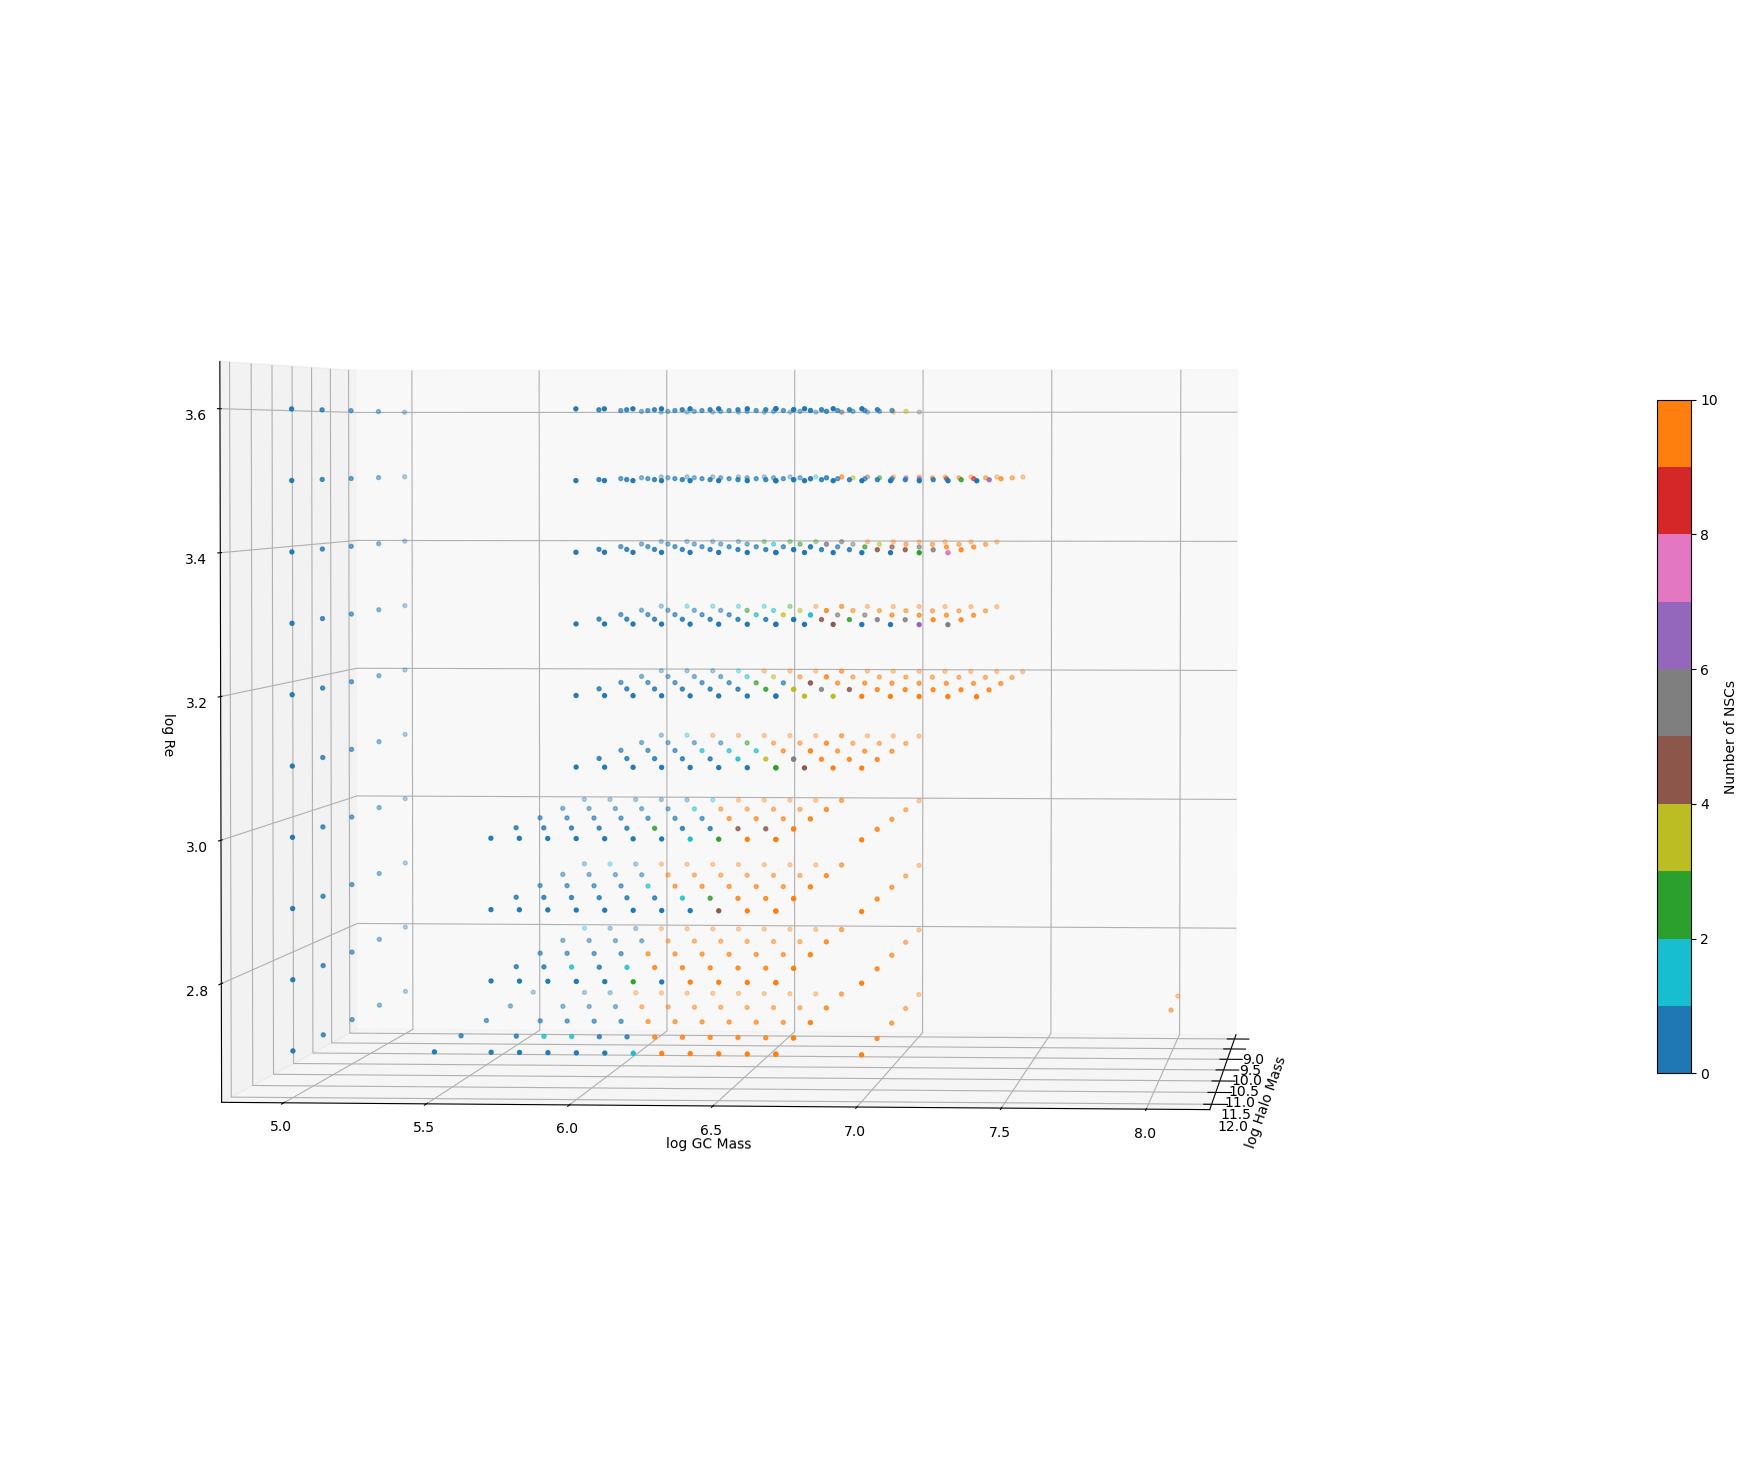

In [41]:
from matplotlib.colors import ListedColormap
# Plot the grid with `n_NSCs` as the color
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')


# Get the original colors from tab10
original_colors = plt.cm.tab10.colors
reordered_indices = [0, 9, 2, 8, 5, 7, 4, 6, 3, 1]  # Replace with your logical order
reordered_colors = [original_colors[i] for i in reordered_indices]
custom_tab10 = ListedColormap(reordered_colors)



# Scatter plot with color mapping based on `n_NSCs`
sc = ax.scatter(plot_halo, plot_GC, plot_Re, c=n_NSCs, cmap=custom_tab10, s = 8)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.35)
cbar.set_label('Number of NSCs')

# Axis labels
ax.set_xlabel('log Halo Mass')
ax.set_ylabel('log GC Mass')
ax.set_zlabel('log Re')

# Viewing angle
ax.view_init(elev=2, azim=5)
plt.show()

In [42]:
# Stack grid and classification data into a single NumPy array
grid_data = np.column_stack((plot_halo, plot_GC, plot_Re, n_NSCs))

# Save as a NumPy file
np.save("../grid_merger_classification_per_iter.npy", grid_data)

print("Grid and classifications saved to grid_merger_classification_per_iter.npy")


Grid and classifications saved to grid_merger_classification_per_iter.npy


# Same but color by max GC mass

In [94]:
trial_num = 'uniform_final_v1'
param_values = np.load('../param_values/param_values_trial'+str(trial_num)+'.npy')
R_es = param_values[:,0]  #R_es in pc
GC_masses = param_values[:,1]  #total GC mass in log Solar Mass
halo_masses = param_values[:,2]  #DM halo in log Solar Mass

GC_masses = np.append(GC_masses, [10**5.5, 10**5.7, 10**5.8, 
                                  10**5.9, 10**6.1, 10**6.2, 10**6.3, 
                                  10**6.4, 10**6.6, 10**6.7,
                                 10**6.7, 10**6.8, 10**6.9, 10**7.1, 
                                  10**7.2, 10**7.3, 10**7.4])
R_es = np.append(R_es, [10**3.5, 10**2.9, 10**2.8, 10**3.1, 10**3.3])

# Value to remove
value_to_remove = 10**8
GC_masses = GC_masses[GC_masses != value_to_remove]
value_to_remove = 10**5
GC_masses = GC_masses[GC_masses != value_to_remove]


In [95]:
# Data containers
plot_Re, plot_GC, plot_halo = [], [], []
std_masses, all_Re, all_GC, all_halo = [], [], [], []
max_mass_distances, central_max_mass = [], []
n_NSCs = []
avg_max_mass = []

# Path for simulation files
path_name = '/home/vk9342/JP_fall_2024/test_sim_run_trial_'+str(trial_num)+'/'

# ## Iterate through every combination of parameters
for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    
    R_e_sim = round(R_e / 1000, 3)
    GC_mass_sim = round(GC_mass * 1e-5, 3)
    halo_mass_sim = round(halo_mass, 1)

    file_name0 = 'Sim_NFW_0_'+str(R_e_sim)+'_'+str(GC_mass_sim)+'_'+str(halo_mass_sim)+'.txt'  #initial
    file_name20 = 'Sim_NFW_20_'+str(R_e_sim)+'_'+str(GC_mass_sim)+'_'+str(halo_mass_sim)+'.txt' #final 
    file_path20 = os.path.join(path_name, file_name20)

    if os.path.exists(file_path20):
        data_initial = np.genfromtxt(os.path.join(path_name, file_name0), skip_header=2)
        data_final = np.genfromtxt(file_path20, skip_header=2)

        iteration_initial, all_masses_initial = data_initial[:, 0], data_initial[:, 1]
        iteration_final, all_masses_final = data_final[:, 0], data_final[:, 1]

        x_final, y_final, z_final = data_final[:, 2], data_final[:, 3], data_final[:, 4]

        # Calculate number of masses per iteration
        def get_mass_counts(iteration, all_masses):
            counts = []
            for t in range(10):
                masses = [mass for i, mass in enumerate(all_masses) if iteration[i] == t]
                counts.append(len(masses))
            return counts
    
        initial_num_masses = get_mass_counts(iteration_initial, all_masses_initial)
        final_num_masses = get_mass_counts(iteration_final, all_masses_final)

        max_masses_and_indices = [
            max(
                ((mass, i) for i, mass in enumerate(all_masses_final) if iteration_final[i] == t), 
                default=(0, -1),  # Default value when no masses exist
                key=lambda x: x[0]  # Compare by mass
            )
            for t in range(10)
        ]

        max_masses = [item[0] for item in max_masses_and_indices]
        avg_max_mass.append(np.log10(np.mean(max_masses)*10**5))

        plot_Re.append(np.log10(R_e))
        plot_GC.append(np.log10(GC_mass))
        plot_halo.append(np.log10(halo_mass))
        

    else:
        print(f'File {file_name20} not found')

File Sim_NFW_20_0.501_63.096_1000000000.0.txt not found
File Sim_NFW_20_0.501_63.096_5623413251.9.txt not found
File Sim_NFW_20_0.501_63.096_31622776601.7.txt not found
File Sim_NFW_20_0.501_63.096_177827941003.9.txt not found
File Sim_NFW_20_0.501_63.096_1000000000000.0.txt not found
File Sim_NFW_20_0.501_79.433_1000000000.0.txt not found
File Sim_NFW_20_0.501_79.433_5623413251.9.txt not found
File Sim_NFW_20_0.501_79.433_31622776601.7.txt not found
File Sim_NFW_20_0.501_79.433_177827941003.9.txt not found
File Sim_NFW_20_0.501_79.433_1000000000000.0.txt not found
File Sim_NFW_20_0.501_125.893_1000000000.0.txt not found
File Sim_NFW_20_0.501_125.893_5623413251.9.txt not found
File Sim_NFW_20_0.501_125.893_31622776601.7.txt not found
File Sim_NFW_20_0.501_125.893_177827941003.9.txt not found
File Sim_NFW_20_0.501_125.893_1000000000000.0.txt not found
File Sim_NFW_20_0.501_158.489_1000000000.0.txt not found
File Sim_NFW_20_0.501_158.489_5623413251.9.txt not found
File Sim_NFW_20_0.501_1

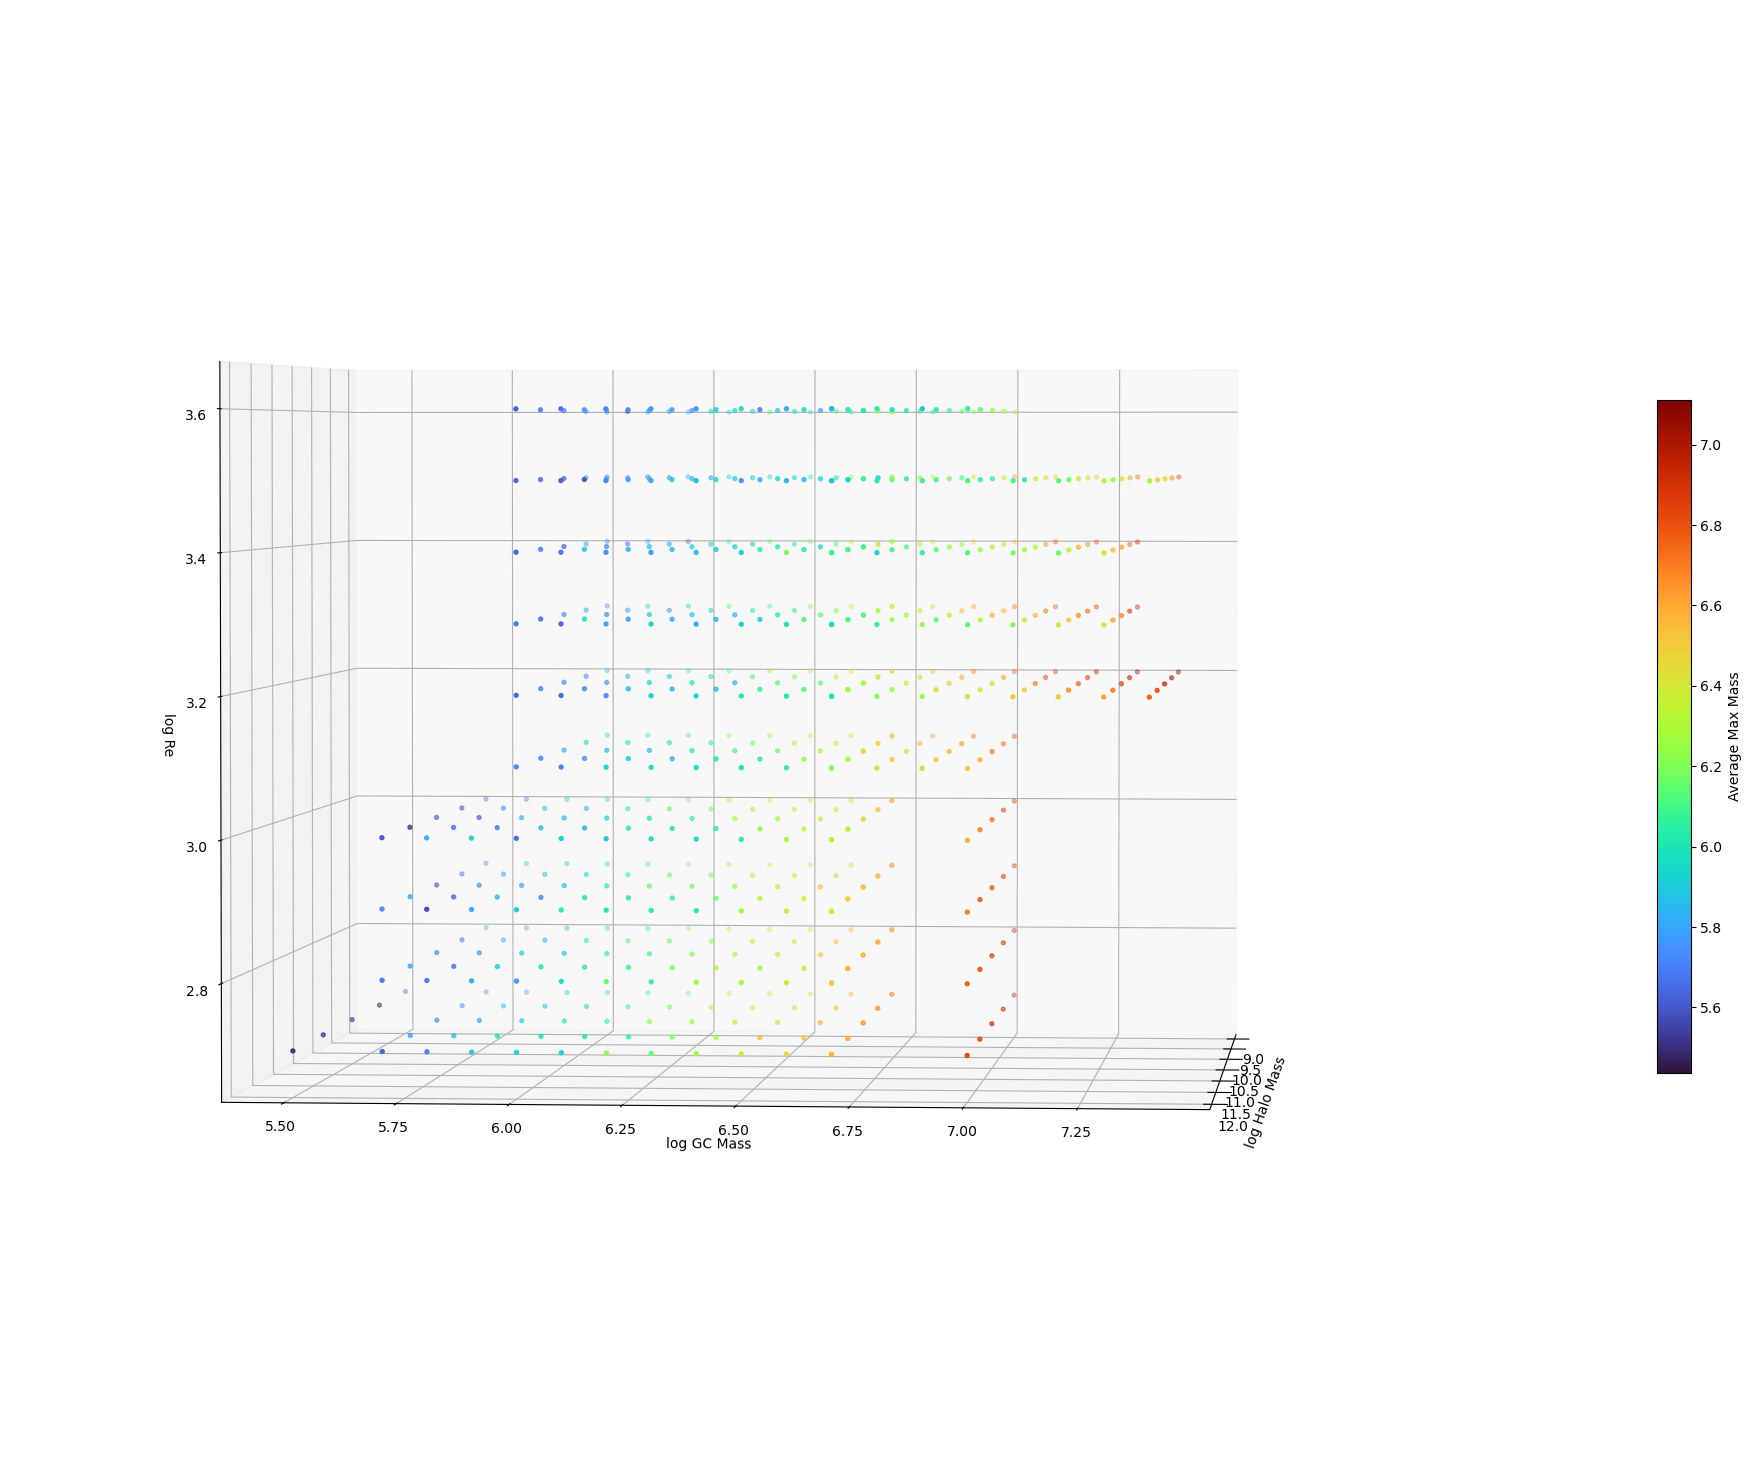

In [100]:
from matplotlib.colors import ListedColormap
# Plot the grid with `n_NSCs` as the color
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d')


# Get the original colors from tab10
original_colors = plt.cm.tab10.colors
reordered_indices = [0, 9, 2, 8, 5, 7, 4, 6, 3, 1]  # Replace with your logical order
reordered_colors = [original_colors[i] for i in reordered_indices]
custom_tab10 = ListedColormap(reordered_colors)



# Scatter plot with color mapping based on `n_NSCs`
sc = ax.scatter(plot_halo, plot_GC, plot_Re, c=avg_max_mass, cmap='turbo', s = 8)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.35)
cbar.set_label('Average Max Mass')

# Axis labels
ax.set_xlabel('log Halo Mass')
ax.set_ylabel('log GC Mass')
ax.set_zlabel('log Re')

# Viewing angle
ax.view_init(elev=2, azim=5)
plt.show()

# IDK what this is 

In [48]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools



# Start timer
start_time = time.time()

# Collect all data points
R_e_values = []
GC_mass_values = []
halo_mass_values = []

for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    R_e_values.append(R_e)
    GC_mass_values.append(GC_mass)
    halo_mass_values.append(halo_mass)




In [ ]:
# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R_e_values, GC_mass_values, halo_mass_values, c='dodgerblue', alpha=0.5, s=5)

ax.set_xlabel('Re')
ax.set_ylabel('GC Mass')
ax.set_zlabel('Halo Mass')

ax.view_init(elev=30, azim=240)

# End timer before rendering
end_time = time.time()

# Calculate time taken
execution_time = end_time - start_time

print(f"Time taken to execute loop: {execution_time} seconds")

# Show plot
plt.show()

print(max(R_e_values))

In [ ]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import os
import seaborn as sns
import pandas as pd

In [ ]:
from plot_data import * 
R_es =[1.532, 2.903, 0.744, 1.189, 2.11, 0.984, 1.0, 1.43, 1.568, 0.885, 3.175, 0.824, 0.635, 
       1.053, 3.477, 1.476, 1.612, 1.426, 1.707, 1.393]
GC_masses = [7.876, 17.795, 19.198, 5.759, 11.169, 16.128, 7.685, 5.52, 42.089, 22.005, 3.894, 
             12.214, 4.615, 25.891, 32.22, 18.812, 27.726, 10.281, 6.34, 38.222]
halo_masses = [93272614300.0, 26248893900.0, 256044812000.0, 68832768300.0, 174653093000.0, 
               103838141000.0, 362040398000.0, 71485095600.0, 133619820000.0, 46835359900.0, 
               19338237200.0, 167265950000.0, 45378628700.0, 36800925900.0, 123862238000.0, 
               73476106800.0, 32197560900.0, 327226465000.0, 150636807000.0, 7548859220.0]




Re = []
GC = []
halo = []
for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    file_name20 = 'Sim_NFW_20_'+str(R_e)+'_'+str(GC_mass)+'_'+str(halo_mass)+'.txt' #final 
    path_name = '/home/vk9342/spring2024research/test_sim_run_1/'
    file = str(path_name) + str(file_name20)
    if os.path.exists(file):
        Re.append(R_e)
        GC.append(GC_mass)
        halo.append(halo_mass)

merger_Re, no_merger_Re, merger_GC, no_merger_GC, merger_halo, no_merger_halo = does_have_merger (R_es = Re, GC_masses = GC, halo_masses = halo, num_iters = 10)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

# Example data
data1 = pd.DataFrame({
    'Re': merger_Re,
    'GC': merger_GC,
    'Halo': merger_halo,
    'Type': ['GC merger'] * len(merger_Re)})

data2 = pd.DataFrame({
    'Re': no_merger_Re,
    'GC': no_merger_GC,
    'Halo': no_merger_halo,
    'Type': ['no GC mergers'] * len(no_merger_Re)})
combined_data = pd.concat([data1, data2])


# plt.figure(figsize=(20, 20))

g = sns.PairGrid(combined_data, hue='Type', corner = True, palette = ['tomato', 'dodgerblue'], height=5)
g.map(sns.scatterplot, s = 10)
g.fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i, y_var in enumerate(g.y_vars):
    for j, x_var in enumerate(g.x_vars):
        if x_var == y_var:
            g.axes[i, j].set_visible(False)

for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.xaxis.label.set_size(15)  # Adjust x-axis label size
        ax.yaxis.label.set_size(15)  # Adjust y-axis label size


g.add_legend(loc='center')
plt.savefig('grid_plot_1.png')
plt.show()


In [ ]:
R_es =[1.532, 2.903, 0.744, 1.189, 2.11, 0.984, 1.0, 1.43, 1.568, 0.885, 3.175, 0.824, 0.635, 
       1.053, 3.477, 1.476, 1.612, 1.426, 1.707, 1.393]
GC_masses = [7.876, 17.795, 19.198, 5.759, 11.169, 16.128, 7.685, 5.52, 42.089, 22.005, 3.894, 
             12.214, 4.615, 25.891, 32.22, 18.812, 27.726, 10.281, 6.34, 38.222]
halo_masses = [93272614300.0, 26248893900.0, 256044812000.0, 68832768300.0, 174653093000.0, 
               103838141000.0, 362040398000.0, 71485095600.0, 133619820000.0, 46835359900.0, 
               19338237200.0, 167265950000.0, 45378628700.0, 36800925900.0, 123862238000.0, 
               73476106800.0, 32197560900.0, 327226465000.0, 150636807000.0, 7548859220.0]
axs = does_have_merger (R_es, GC_masses, halo_masses, 10)
plt.show